In [31]:
# pip install xgboost // install when you need

^C
Note: you may need to restart the kernel to use updated packages.


## PART 01 Overview && Data PreProcessing

In [1]:
# import thư viện panda để xử lí file csv
import pandas as pd
# đọc file và lưu vào biến full_data
full_data = pd.read_csv('./weatherAUS.csv') 

In [2]:
# Đọc 5 dòng dữ liệu đầu tiên
full_data.head() 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
# Thuộc tính shape được sử dụng để tìm kích thước của tập dữ liệu.
print(full_data.shape)

(142193, 24)


In [4]:
# tái cấu trúc lại tập dữ liệu
# chuyển đổi kiểu dữ liệu trong cột Date (object) sang kiểu datetime

full_data['Date'] = pd.to_datetime(full_data['Date']) 

# tạo cột year (kiểu dữ liệu int) từ cột Date
full_data['year'] = full_data['Date'].dt.year

# tạo cột month (kiểu dữ liệu int) từ cột Date
full_data['month'] = full_data['Date'].dt.month

# tạo cột day (kiểu dữ liệu int) từ cột Date
full_data['day'] = full_data['Date'].dt.day

# bỏ cột Date sau khi đã trích xuất dữ liệu
full_data.drop(['Date'], axis=1, inplace=True)



In [5]:
# kiểm tra dữ liệu sau khi tái cấu trúc
# dễ thấy ta có 3 cột dữ liệu mới là year, day, month
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [6]:
# Thuộc tính shape được sử dụng để tìm kích thước của tập dữ liệu.
full_data.shape 

(142193, 26)

In [7]:
# tóm tắt ngắn gọn thông tin về tập dữ liệu
# dataset có 3 kiểu dữ liệu: 26 cột gồm 16 cột float64, 6 cột object và 3 cột int64
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [8]:
# tạo thống kê mô tả cho tập dữ liệu bằng cách sử dụng hàm description () ở pandas.
full_data.describe(exclude=[object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,year,month,day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


In [9]:
full_data.describe(include=[object])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,132863,132180,138415,140787,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,9780,11393,10663,109332,110316


In [10]:
# map giá trị của cột RainToday từ Yes No sang 1 và 0 (kiểu dữ liệu int)
full_data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)

# map giá trị của cột RainTomorrow từ Yes No sang 1 và 0 (kiểu dữ liệu int)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [11]:
# kiểm tra lại tập dữ liệu
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,0.0,0.0,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,0.0,0.0,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,0.0,0.0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,0.0,1.0,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,0.0,0.2,0,2008,12,5


In [12]:
# Kiểm tra bao nhiêu giá trị null ở từng thuộc tính bằng hàm isnull()
full_data.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
year                 0
month                0
day                  0
dtype: int64

In [13]:
# lọc hết tất cả giá trị null ở từng thuộc tính
full_data = full_data.fillna(method='ffill')
full_data = full_data.fillna(method='backfill')

In [14]:
# Ta có thể kiểm tra dữ liệu các dòng null ở mỗi thuộc tính bằng hàm isna()
full_data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [15]:
full_data.shape

(142193, 26)

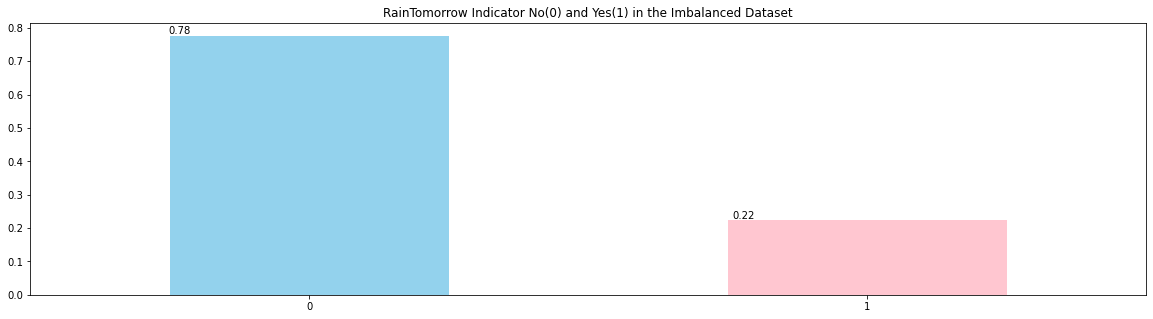

In [16]:
# Với RainTomorrow là biến mục tiêu
# Có vẻ như biến Target không cân bằng. Nó có nhiều giá trị ‘No’ hơn. Nếu dữ liệu không cân bằng, thì nó có thể làm giảm hiệu suất của mô hình. 
# Vì dữ liệu này được phát hành bởi bộ phận khí tượng của Úc, nên sẽ không có ý nghĩa gì khi ta cố gắng cân bằng biến mục tiêu, 
# vì tính trung thực của dữ liệu có thể giảm xuống. Vì vậy, ta sẽ giữ nó như nó vốn có.

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax = full_data.RainTomorrow.value_counts(normalize=True).plot(
    kind='bar', color=['skyblue', 'pink'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)),
                (p.get_x() * 1.01, p.get_height() * 1.01))
plt.show()

In [17]:
# tạo ra các mẫu mới (upsample) sao cho tỉ lệ giá trị RainTomorrow bằng nhau

# import resample
from sklearn.utils import resample

# tách các record có giá trị RainTomorrow = 0
no = full_data[full_data.RainTomorrow == 0]

# tách các record có giá trị RainTomorrow = 1
yes = full_data[full_data.RainTomorrow == 1]

# upsample - tạo các giá trị dữ liệu mới mà RainTorrow = 1 
# sao cho dữ số lượng dữ liệu dữ liệu của yes và no bằng nhau
yes_oversampled = resample(
    yes, replace=True, n_samples=len(no), random_state=42)

# kết hợp 2 bảng dữ liệu yes và no lại với nhau
oversampled = pd.concat([no, yes_oversampled])


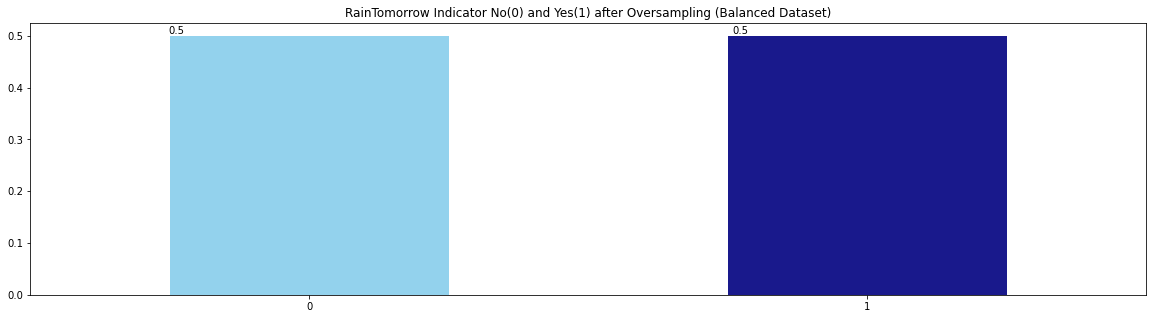

In [18]:
# trực quan hoá dữ liệu lên biểu đồ
# ta có thể thấy được sự cân bằng của dự liệu trong lần này
fig = plt.figure(figsize=(20, 5))
ax = oversampled.RainTomorrow.value_counts(normalize=True).plot(
    kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title(
    'RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)),
                (p.get_x() * 1.01, p.get_height() * 1.01))
plt.show()

# resample the codes so that it got the same ratio between value of RainTomorrow


<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

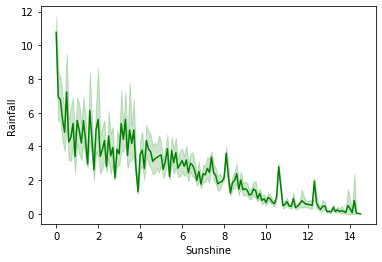

In [20]:
# Bi-variate Analysis: Phân tích 2 biên thể
#  Sunshine vs Rainfall: ta thấy 2 biến thể này tỷ lệ nghịch với nhau
import seaborn as sns
sns.lineplot(data=full_data,x='Sunshine',y='Rainfall',color='green')

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

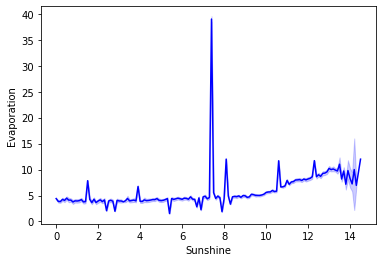

In [21]:
# Bi-variate Analysis: Phân tích 2 biên thể
#  Sunshine vs Evaporation: ta thấy 2 biến thể này tỷ lệ khá thuận với nhau
sns.lineplot(data=full_data,x='Sunshine',y='Evaporation',color='blue')

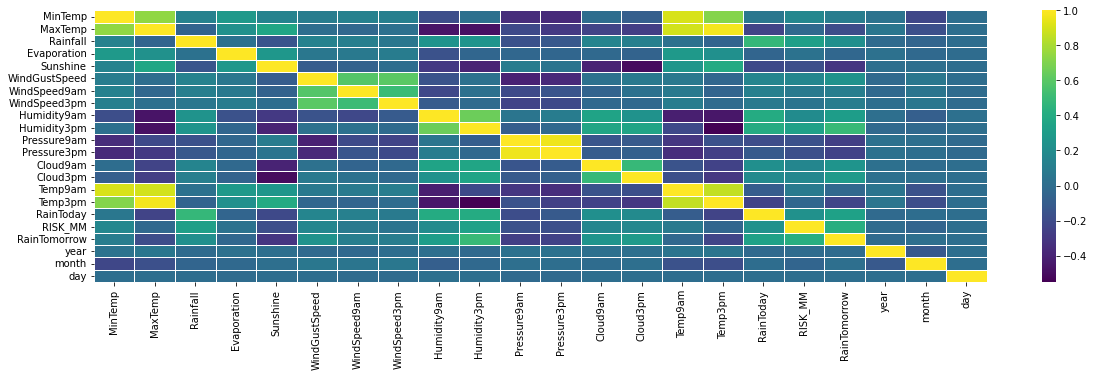

In [22]:
# vẽ biểu đồ heatmap
# Tương quan là một thống kê giúp đo lường độ bền của mối quan hệ giữa hai đối tượng địa lý. Nó được sử dụng trong phân tích lưỡng biến.
plt.figure(figsize=(20, 5))
sns.heatmap(oversampled.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')
plt.show()


In [23]:
display(oversampled.notnull().count() == oversampled.isnull().count())

Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
WindSpeed9am     True
WindSpeed3pm     True
Humidity9am      True
Humidity3pm      True
Pressure9am      True
Pressure3pm      True
Cloud9am         True
Cloud3pm         True
Temp9am          True
Temp3pm          True
RainToday        True
RISK_MM          True
RainTomorrow     True
year             True
month            True
day              True
dtype: bool

In [24]:
# Thể hiện sự thiếu hụt dữ liệu trong tập dữ liệu đang xử lí


# Tổng số dữ liệu thiếu hụt theo Feature 
total = oversampled.isnull().sum().sort_values(ascending=False)

# Phần trăm số dữ liệu thiếu hụt với toàn thể dữ liệu 
percent = (oversampled.isnull().sum()/oversampled.isnull().count()
           ).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Thể hiện dữ liệu 
missing.head()

# ==> Ta thấy hiện tại không có sự thiếu hụt về dữ liệu

,Total,Percent
Location,0,0.0
MinTemp,0,0.0
month,0,0.0
year,0,0.0
RainTomorrow,0,0.0


## PART 02 Data PreProcessing

In [26]:
# Nhân số lượng dữ liệu theo cột có kiểu dữ liệu object
oversampled.select_dtypes(include=['object']).columns


Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [27]:
# Thay các giá trị rỗng của các cột thành mode
# Thay giá trị NA của cột Location thành giá trị mode
oversampled['Location'] = oversampled['Location'].fillna(
    oversampled['Location'].mode()[0])
# Thay giá trị NA của cột WindGustDir thành giá trị mode
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(
    oversampled['WindGustDir'].mode()[0])
# Thay giá trị NA của cột WindDir9am thành giá trị mode
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(
    oversampled['WindDir9am'].mode()[0])
# Thay giá trị NA của cột WindDir3pm thành giá trị mode
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(
    oversampled['WindDir3pm'].mode()[0])


In [28]:
# Chuyển categorical features thành continuous features với Label Encoding
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
lencoders = {}
# Chuyển các giá trị có kiểu dữ liệu object thành các số có quy tắc
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])


In [29]:
# Import enable_iterative_imputer
from sklearn.experimental import enable_iterative_imputer
# Import IterativeImputer
from sklearn.impute import IterativeImputer
# Thêm cảnh báo
import warnings
warnings.filterwarnings("ignore")
# multiple imputation by chained equations xử lý dữ liệu bị mất
MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)


In [31]:
# Tìm các giá trị ngoại lai bằng IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
# Xuất bảng IQR
print(IQR)


Location         25.0
MinTemp           9.2
MaxTemp          10.2
Rainfall          2.2
Evaporation       6.8
Sunshine          7.1
WindGustDir       9.0
WindGustSpeed    19.0
WindDir9am        8.0
WindDir3pm        8.0
WindSpeed9am     13.0
WindSpeed3pm     11.0
Humidity9am      27.0
Humidity3pm      31.0
Pressure9am       9.0
Pressure3pm       9.2
Cloud9am          4.0
Cloud3pm          6.0
Temp9am           9.3
Temp3pm          10.0
RainToday         1.0
RISK_MM           5.2
RainTomorrow      1.0
year              5.0
month             5.0
day              15.0
dtype: float64


In [32]:
# Bỏ các giá trị ngoại lai khỏi dataset
MiceImputed = MiceImputed[~(
    (MiceImputed < (Q1 - 1.5 * IQR)) | (MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape


(154607, 26)

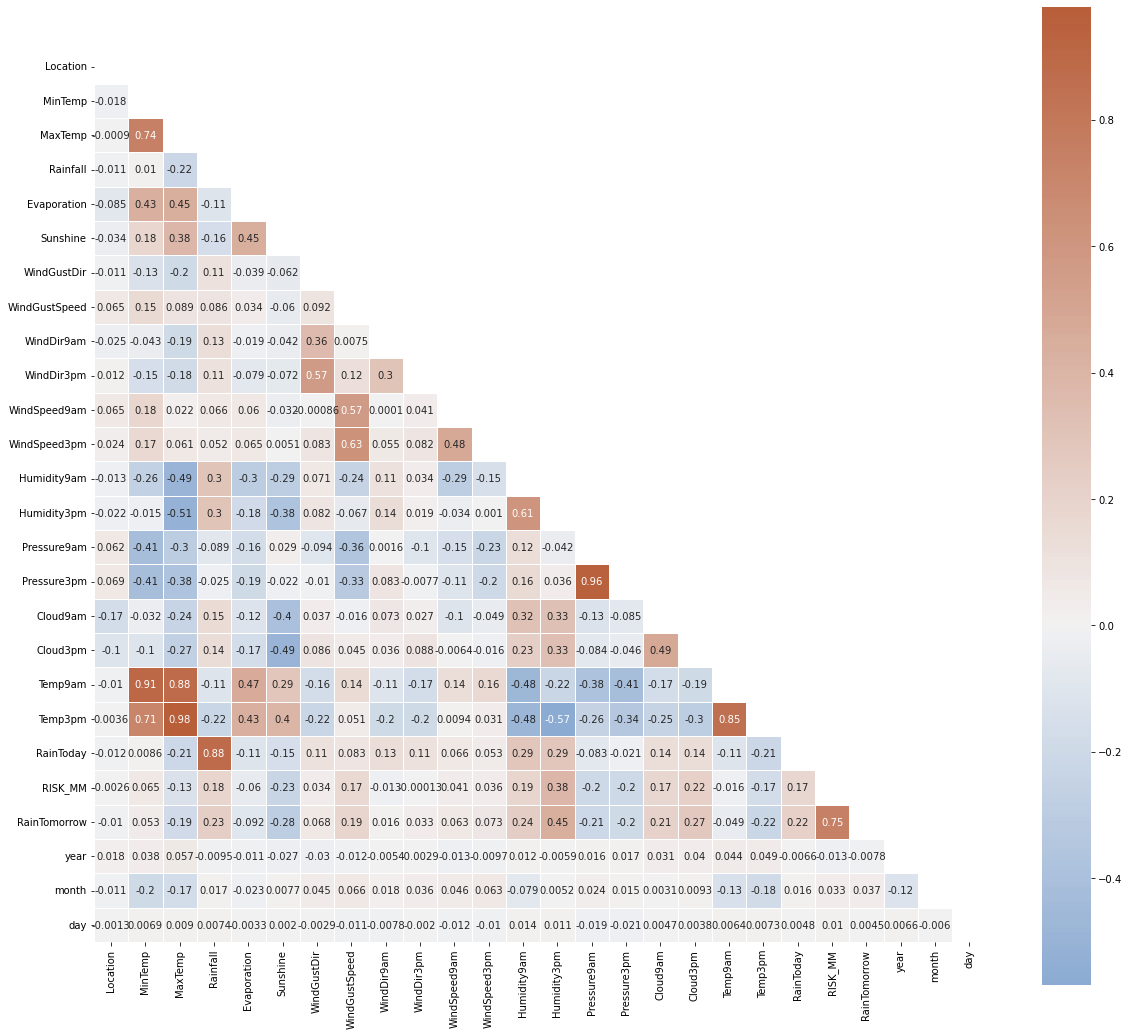

In [33]:
# Vẽ biểu đồ heatmap
# Import numpy, matplotlib.pyplot, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Tạo mối quan hệ tương quan
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
# Xuất biểu đồ tương quan heatmap
plt.show()


In [34]:
# Chuẩn hóa dữ liệu
# Import preprocessing
from sklearn import preprocessing
# Training dữ liệu
# Sử dụng MinMaxScaler để tránh số âm
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
# Đổi bảng dữ liệu
modified_data = pd.DataFrame(r_scaler.transform(
    MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)


In [35]:
# Lọc các thuộc tính quan trọng bằng Filter Method (Chi-Square)
# Import SelectKBest, Chi2
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:, modified_data.columns != 'RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
# Xuất các thuộc tính quan trọng
print(X.columns[selector.get_support(indices=True)])


Index(['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


In [36]:
# Import SelectFromModel, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
# Lựa chọn thuộc tính bằng phương pháp warpping
X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:, support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X, y).feature_importances_)


['Humidity3pm', 'RISK_MM']
[0.00134242 0.00265565 0.00227261 0.01130119 0.00159626 0.01816148
 0.00141693 0.00764995 0.00176228 0.00161575 0.00114274 0.00152813
 0.00500394 0.06227906 0.00600201 0.00878645 0.00321797 0.01159648
 0.00215388 0.00461256 0.00551528 0.83496011 0.00089752 0.00121666
 0.00131269]


In [37]:
# Import StandardScaler, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                        'RainToday']]
target = MiceImputed['RainTomorrow']

# Chia biến features với target thành test và train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Chuẩn hóa thuộc tính 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [38]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [39]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report


def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    plot_confusion_matrix(model, X_test, y_test,
                          cmap=plt.cm.Blues, normalize='all')

    return model, accuracy, roc_auc, coh_kap, time_taken


## PART 03 LogisticRegression | Decision Tree | Neural Network

Accuracy = 0.7648276308130134
ROC Area under Curve = 0.7370469062308004
Cohen's Kappa = 0.4884151893401626
Time taken = 3.4539990425109863
              precision    recall  f1-score   support

         0.0    0.78116   0.85790   0.81774     19015
         1.0    0.73085   0.61619   0.66864     11907

    accuracy                        0.76483     30922
   macro avg    0.75601   0.73705   0.74319     30922
weighted avg    0.76179   0.76483   0.76032     30922



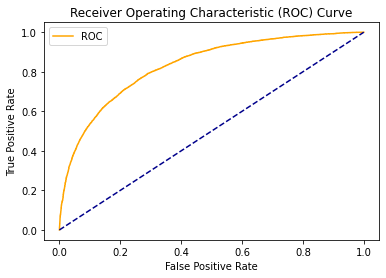

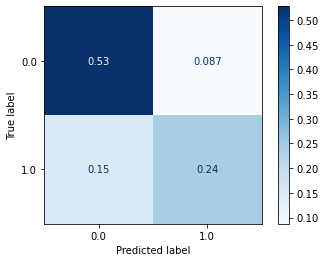

In [40]:
# LogisticRegression
# import Logistic Regression từ thư viện sklearn
from sklearn.linear_model import LogisticRegression
# define tham số truyền vào
# penalty :Chỉ định định mức của penalty: l1:
# solver: Thuật toán để sử dụng trong vấn đề tối ưu hóa :Liblinear
params_lr = {'penalty': 'l1', 'solver': 'liblinear'}
# Apply LogisticRegression truyền vào các tham số
model_lr = LogisticRegression(**params_lr)
# hiển thị kết quả và vẽ biểu đồ 
# accuracy: Tính toán độ chính xác dựa trên dự báo mạng lưới neuron
# ROC Area under Curve : là thước đo khả năng phân loại giúp phân biệt giữa các lớp và được sử dụng như một bản tóm tắt của đường cong ROC
# Cohen's Kappa
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(
    model_lr, X_train, y_train, X_test, y_test)


Accuracy = 0.8321906733070306
ROC Area under Curve = 0.8256152572214662
Cohen's Kappa = 0.6476216674969866
Time taken = 0.6563148498535156
              precision    recall  f1-score   support

         0.0    0.87047   0.85422   0.86227     19015
         1.0    0.77394   0.79701   0.78530     11907

    accuracy                        0.83219     30922
   macro avg    0.82220   0.82562   0.82379     30922
weighted avg    0.83330   0.83219   0.83263     30922



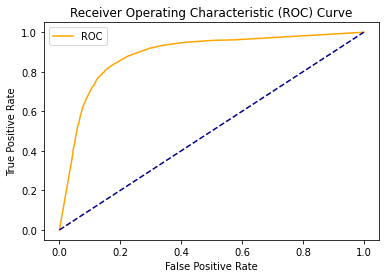

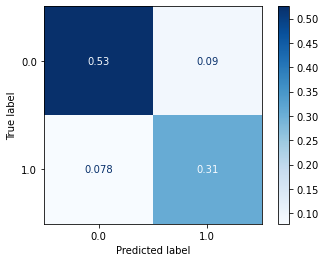

In [41]:
# Decision Tree
#import DecisionTreeClassifier từ thư viện sklearn
from sklearn.tree import DecisionTreeClassifier
# define tham số truyền vào
# max_depthL Độ sâu tối đa của cây = 16 và max_features: Số lượng các feature cần xem xét khi tìm kiếm sự phân chia tốt nhất 
# “sqrt” => max_features=sqrt(n_features).
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}
# Apply DecisionTreeClassifier với các tham số truyền vào
model_dt = DecisionTreeClassifier(**params_dt)
# hiển thị kết quả và vẽ biểu đồ 
# accuracy: Tính toán độ chính xác dựa trên dự báo mạng lưới neuron
# ROC Area under Curve : là thước đo khả năng phân loại giúp phân biệt giữa các lớp và được sử dụng như một bản tóm tắt của đường cong ROC
# Cohen's Kappa
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(
    model_dt, X_train, y_train, X_test, y_test)


Accuracy = 0.7922514714442792
ROC Area under Curve = 0.774225919205864
Cohen's Kappa = 0.5556033433509775
Time taken = 220.06000351905823
              precision    recall  f1-score   support

         0.0    0.81739   0.85264   0.83465     19015
         1.0    0.74727   0.69581   0.72062     11907

    accuracy                        0.79225     30922
   macro avg    0.78233   0.77423   0.77763     30922
weighted avg    0.79039   0.79225   0.79074     30922



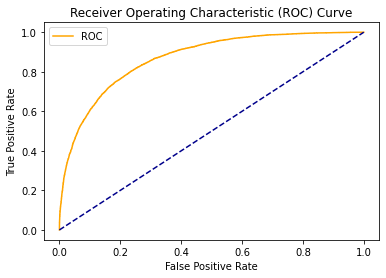

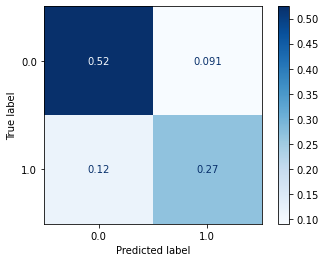

In [42]:
# Neural Network
#import MLPClassifier từ thư viện sklearn
from sklearn.neural_network import MLPClassifier
# define tham số truyền vào
# hidden_layer_sizes: Phần tử ith đại diện cho số lượng neurons trong lớp ẩn Ith. tuple = 30, length = n_layers - 2 = 30, default=(30)
# activation: Chức năng kích hoạt cho lớp ẩn - logistic: hàm sigmoid logistic trả về f(x) = 1 / (1 + exp(-x))
# solver: Đơn vị tối ưu hóa độ phức tạp
# max_iter: Số lần lặp tối đa
params_nn = {'hidden_layer_sizes': (30, 30, 30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}
# Apply MLPClassifier với các tham số truyền vào
model_nn = MLPClassifier(**params_nn)
# hiển thị kết quả và vẽ biểu đồ 
# accuracy: Tính toán độ chính xác dựa trên dự báo mạng lưới neuron
# ROC Area under Curve : là thước đo khả năng phân loại giúp phân biệt giữa các lớp và được sử dụng như một bản tóm tắt của đường cong ROC
#Cohen's Kappa
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(
    model_nn, X_train, y_train, X_test, y_test)


## PART 04 Random Forest | Light GBM | Catboost | XGBoost

Accuracy = 0.9133949938555074
ROC Area under Curve = 0.9077943685792962
Cohen's Kappa = 0.8168453012099314
Time taken = 31.392995595932007
              precision    recall  f1-score   support

         0.0    0.92738   0.93216   0.92976     19015
         1.0    0.89076   0.88343   0.88708     11907

    accuracy                        0.91339     30922
   macro avg    0.90907   0.90779   0.90842     30922
weighted avg    0.91328   0.91339   0.91333     30922



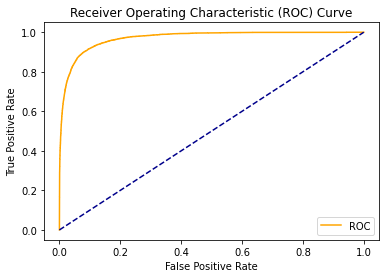

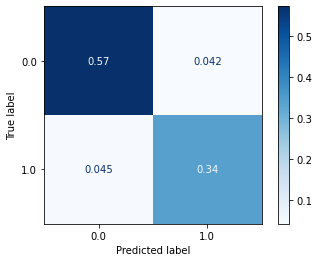

In [43]:
# Random Forest
# import Random Forest từ thư viện sklearn
from sklearn.ensemble import RandomForestClassifier
# tùy chỉnh các thiết lập của Random Forest như sau:
#   max_depth: độ sâu tối đa = 16
#   min_smaples_leaf: số mẫu tối thiểu cần để thành 1 node lá = 1
#   min_samples_split: số mẫu tối thiểu cần để chia node = 2
#   n_estimators: số cây trong Forest = 100
#   random_state: hệ số ngẫu nhiên dùng để dựng cây = 42
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
# accuracy: dùng thuật toán Accuracy classification score để tính độ chính xác
# roc_auc: dùng thuật toán Receiver Operating Characteristic Curve để tính độ chính xác 
# coh_kap: dùng thuật toán Cohen's kappa để tính độ chính xác 
# cuối cùng hiển thị kết quả và vẽ đồ thị
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(
    model_rf, X_train, y_train, X_test, y_test)


Accuracy = 0.828083565099282
ROC Area under Curve = 0.8121982660738615
Cohen's Kappa = 0.6323573127239461
Time taken = 3.8463780879974365
              precision    recall  f1-score   support

         0.0    0.84564   0.88130   0.86310     19015
         1.0    0.79676   0.74309   0.76899     11907

    accuracy                        0.82808     30922
   macro avg    0.82120   0.81220   0.81605     30922
weighted avg    0.82682   0.82808   0.82686     30922



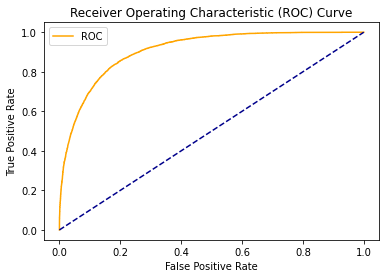

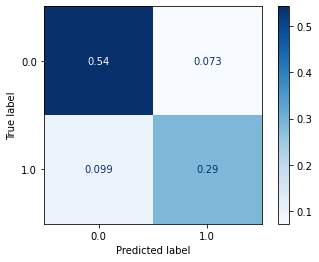

In [44]:
# Light GBM
# import Light GBM về máy
import lightgbm as lgb
# tùy chỉnh các thiết lập của Light GBM như sau:
#   colsample_bytree: một phần được chọn của cột thuộc tính để dựng cây = 0.95
#   max_depth: độ sâu tối đa = 16
#   min_split_gain: số mẫu tối thiểu cần để thành 1 node lá = 1
#   n_estimators: số cây trong Forest = 200
#   num_leaves: số lá tối đa của cây = 50
#   reg_alpha: trọng số L1 = 1.2
#   reg_lambda: trọng số L2 = 1.2
#   subsample: một phần được chọn của hàng dữ liệu để dựng cây = 0.95
#   subsample_freq: tần số sử dụng subsample = 20
params_lgb = {'colsample_bytree': 0.95,
              'max_depth': 16,
              'min_split_gain': 0.1,
              'n_estimators': 200,
              'num_leaves': 50,
              'reg_alpha': 1.2,
              'reg_lambda': 1.2,
              'subsample': 0.95,
              'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
# accuracy: dùng thuật toán Accuracy classification score để tính độ chính xác
# roc_auc: dùng thuật toán Receiver Operating Characteristic Curve để tính độ chính xác 
# coh_kap: dùng thuật toán Cohen's kappa để tính độ chính xác 
# cuối cùng hiển thị kết quả và vẽ đồ thị
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(
    model_lgb, X_train, y_train, X_test, y_test)


Accuracy = 0.9388784684043723
ROC Area under Curve = 0.9426108259777585
Cohen's Kappa = 0.8727549252001163
Time taken = 234.49450421333313
              precision    recall  f1-score   support

         0.0    0.97294   0.92637   0.94908     19015
         1.0    0.89077   0.95885   0.92356     11907

    accuracy                        0.93888     30922
   macro avg    0.93185   0.94261   0.93632     30922
weighted avg    0.94130   0.93888   0.93925     30922



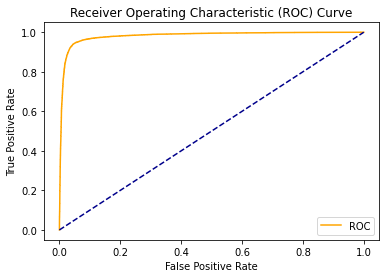

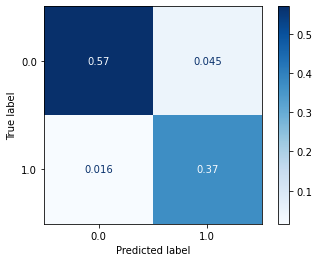

In [45]:
# catboost
# import catboost về máy
import catboost as cb
# tùy chỉnh các thiết lập của catboost như sau:
# iterations: số lượng cây tối đa có thể dựng được = 50
# max_depth: độ sâu tối đa = 16
params_cb = {'iterations': 50,
             'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
# accuracy: dùng thuật toán Accuracy classification score để tính độ chính xác
# roc_auc: dùng thuật toán Receiver Operating Characteristic Curve để tính độ chính xác 
# coh_kap: dùng thuật toán Cohen's kappa để tính độ chính xác 
# cuối cùng hiển thị kết quả và vẽ đồ thị
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(
    model_cb, X_train, y_train, X_test, y_test, verbose=False)


[15:55:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9564387814501003
ROC Area under Curve = 0.9582075817182605
Cohen's Kappa = 0.908783260453484
Time taken = 153.49099707603455
              precision    recall  f1-score   support

         0.0    0.97803   0.95051   0.96408     19015
         1.0    0.92437   0.96590   0.94468     11907

    accuracy                        0.95644     30922
   macro avg    0.95120   0.95821   0.95438     30922
weighted avg    0.95737   0.95644   0.95661     30922



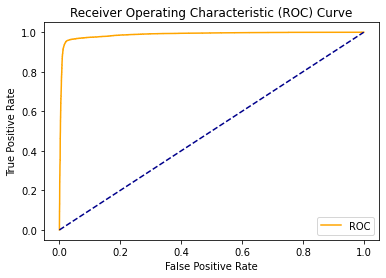

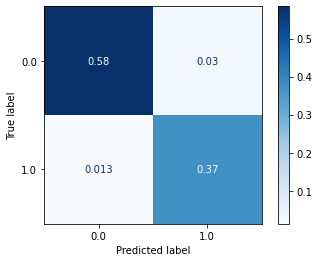

In [46]:
# XGBoost
# import XGBoost về máy 
import xgboost as xgb
# tùy chỉnh các thiết lập của XGBoost như sau:
#   max_depth: độ sâu tối đa = 16
#   n_estimators: số cây trong Forest = 500
params_xgb = {'n_estimators': 500,
              'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
# accuracy: dùng thuật toán Accuracy classification score để tính độ chính xác
# roc_auc: dùng thuật toán Receiver Operating Characteristic Curve để tính độ chính xác 
# coh_kap: dùng thuật toán Cohen's kappa để tính độ chính xác 
# cuối cùng hiển thị kết quả và vẽ đồ thị
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(
    model_xgb, X_train, y_train, X_test, y_test)


## PART 05 Comparison && Evaluation 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[16:01:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[16:02:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'

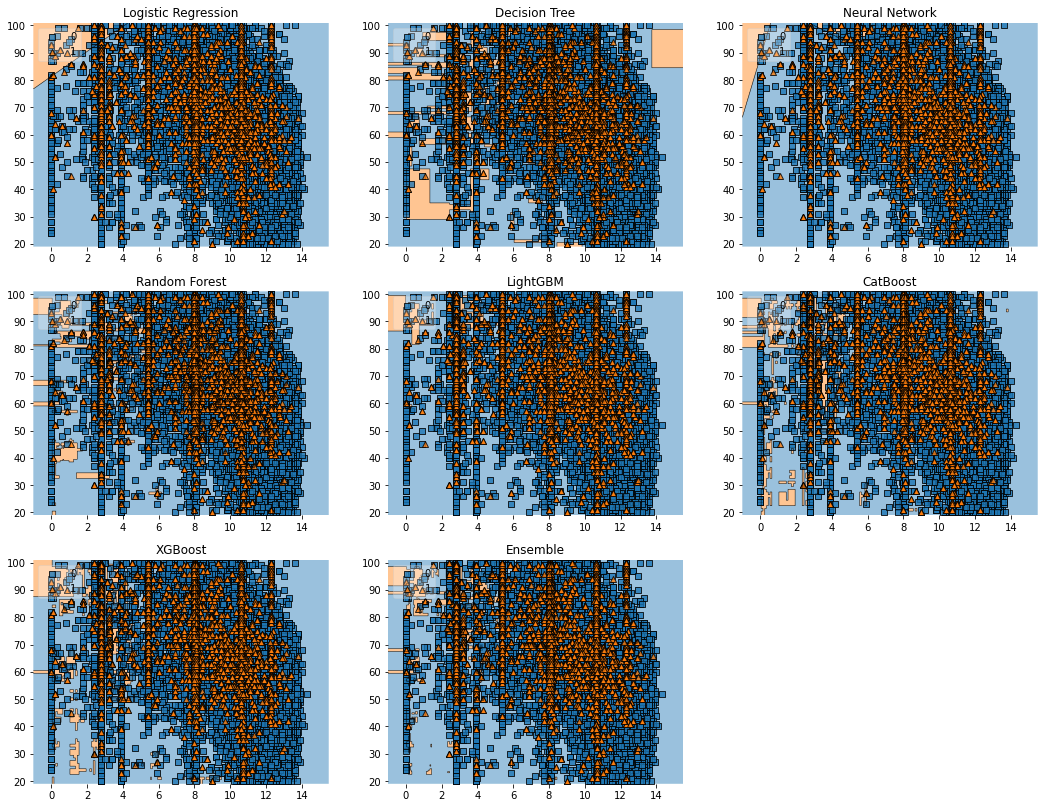

In [47]:
# Plot the decision boundaries of a VotingClassifier
# Vẽ các vùng quyết định của từng bộ phân loại

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

# Khai báo 7 lớp đối tượng thuật toán phân loại
# Gán 1 giá trị random_state-42 cố định để đảm bảo kết quả đầu ra khi thực thi code luôn là giá trị cố định
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = MLPClassifier(random_state=42, verbose=0)
clf4 = RandomForestClassifier(random_state=42)
clf5 = lgb.LGBMClassifier(random_state=42, verbose=0)
clf6 = cb.CatBoostClassifier(random_state=42, verbose=0)
clf7 = xgb.XGBClassifier(random_state=42)

# Tạo 1 lớp đối tượng phân loại biểu quyết đa số với đầu vào là các lớp phân loại RandomForest, LGBM, CatBoost, XGB
# Trong soft voting, lớp đầu ra được tạo bằng cách lấy trung bình xác suất của các lớp đầu vào
# Với trọng số weights = 1 cho các lớp được tính như nhau
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[
                              1, 1, 1, 1], voting='soft')

# took only really important features
# tạo bảng X gồm các cột "Sunshine", "Humidity9am", "Cloud3pm"
X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]]
# chuyển X_list thành dạng array với data type là float 32
X = np.asarray(X_list, dtype=np.float32)
# tạo bảng Y gồm cột RainTomorrow
y_list = MiceImputed["RainTomorrow"]
# chuyển Y_list thành dạng array với data type là float 32
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
# tạo bố cục lưới 3 hàng và 3 cột
gs = gridspec.GridSpec(3, 3)
# tạo hình với chiều rộng 18 và chiều cao 14
fig = plt.figure(figsize=(18, 14))

# danh sách các nhãn
labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

# Vẽ các vùng quyết định của từng bộ phân loại
# clf: Đối tượng phân loại của từng model
# itertools: Các công cụ chức năng để tạo và sử dụng trình vòng lặp.
# lab === labels: tên bộ phân loại
# filler_feature_values: Chỉ cần thiết cho các đối tượng số> 2. 
# -- Từ điển các cặp chỉ mục-giá trị của đối tượng địa lý cho các đối tượng địa lý không được vẽ biểu đồ.
# filler_feature_ranges: Chỉ cần thiết cho các đối tượng số> 2. Từ điển các cặp chỉ mục-giá trị của đối tượng địa lý cho các đối tượng địa lý không được vẽ biểu đồ. 
# -- Sẽ sử dụng các phạm vi được cung cấp để chọn các mẫu đào tạo cho việc vẽ biểu đồ.

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,
                                filler_feature_values={2: value},
                                filler_feature_ranges={2: width},
                                legend=2)
    plt.title(lab)

plt.show()

# ta nhận thấy các dữ liệu trong tập training hiện tại chưa phân lớp đúng ở mọi bộ phận loại


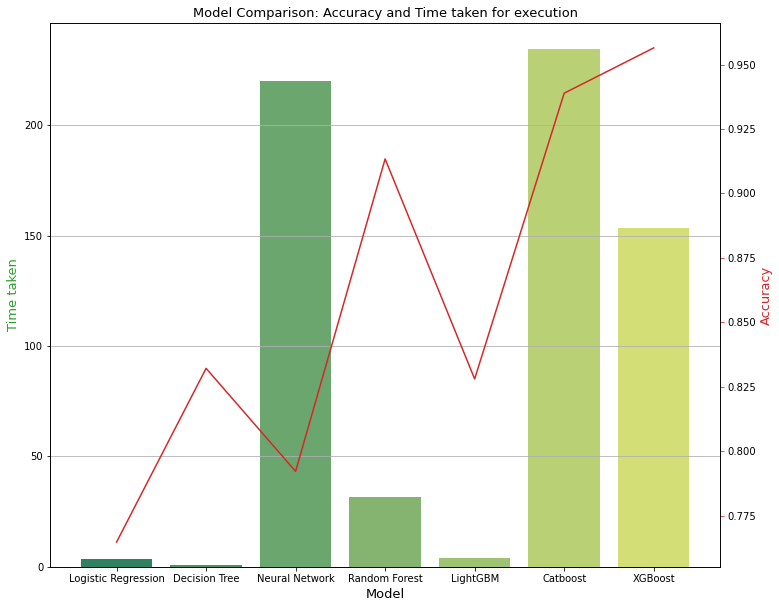

In [48]:
# khai báo mảng chứa các biến Accuracy của từng thuật toán
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn,
                   accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
# khai báo mảng chứa các biến ROC Area under Curve của từng thuật toán
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn,
                  roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
# khai báo mảng chứa Cohen's Kappa của từng thuật toán
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn,
                  coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
# khai báo mảng chứa các biến Time Taken của từng thuật toán
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

# Xây dựng model
model_data = {'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network', 'Random Forest', 'LightGBM', 'Catboost', 'XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

# Vẽ biểu đồ với cột x là tên Model và y là giá trị Accuracy và Time taken của từng model
# Time taken là giá trị chiều cao cột màu xanh
# Accuracy là đường kẻ đỏ

fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.set_title(
    'Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data=data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data=data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


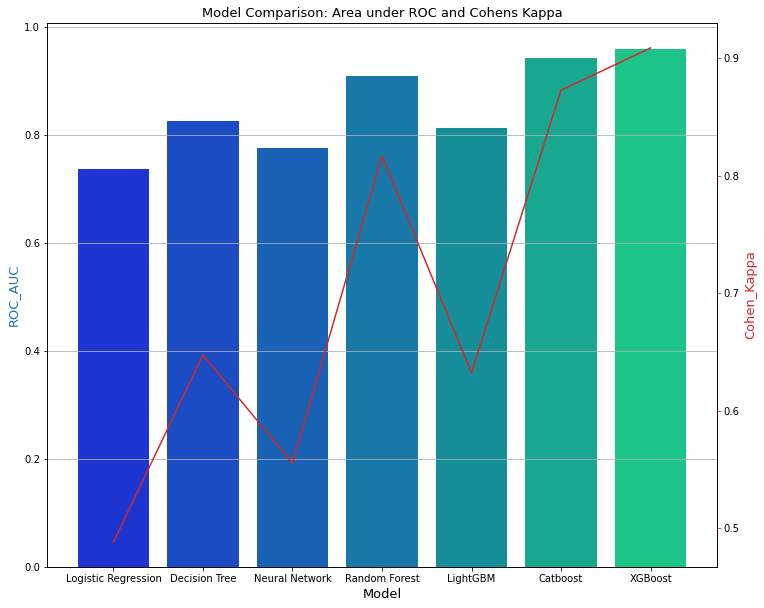

In [49]:
# Vẽ biểu đồ với cột x là tên Model và y là giá trị Roc và Cohen's Kappa của từng model
# Roc là giá trị chiều cao cột màu xanh
# Cohen's Kappa là đường kẻ đỏ

fig, ax3 = plt.subplots(figsize=(12, 10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data=data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa',
                   data=data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()
